# Packages

In [1]:
# Numerical and Data Manipulation
import numpy as np
import pandas as pd
import itertools

# Database Querying
import yfinance as yf

# Model Setup and Manipulation
from arch import arch_model
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Plotting
import matplotlib.pyplot as plt

# Functions

In [2]:
def plot(data1: pd.DataFrame, title: str, data2=None, data3=None, label=None, label1=None, label2=None):
    '''
    Must have one data and its title
    Parameteres:
        data1: pandas Data Frame
        title: string
    '''
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    
    if isinstance(data1, (pd.Series, pd.DataFrame)):
        plt.plot(data1, label=label)
        ylabel = data1.columns[0] if isinstance(data1, pd.DataFrame) else data1.name
        xlabel = data1.index.name
    else:
        plt.plot(data1, label=label)
        ylabel = 'Value'
        xlabel = 'Index'
    
    if data2 is not None:
        if isinstance(data2, (pd.Series, pd.DataFrame)):
            plt.plot(data2, linestyle='--', label=label1)
    
    if data3 is not None:
        if instance(data3, (pd.Series, pd.DataFrame)):
            plt.plot(data3, linestyle='_', label=label2)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel if xlabel is not None else 'Index')
    plt.title(title)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [49]:
def get_data(ticker: str, time_frame: int):
    '''
    Returns pandas DataFrame of given
    Parameteres:
        ticker: string, company Ticker in Yahoo Finance
        time_frame = integer, fraction of a year
    '''
    df = yf.download(ticker,
                     start=dt.datetime.today() - dt.timedelta(days=time_frame*365), 
                     end=dt.datetime.today())['Close']
    df = pd.DataFrame(df)
    return pd.DataFrame(df)

In [36]:
aapl = yf.download('AAPL', start=dt.datetime.today() - dt.timedelta(days=1/12*365), end=dt.datetime.today())['Close']
tod = aapl.index[-1]
n_y = aapl.index[0]
print(aapl)
print(tod)
print(n_y)

[*********************100%%**********************]  1 of 1 completed

Date
2024-06-03    194.029999
2024-06-04    194.350006
2024-06-05    195.869995
2024-06-06    194.479996
2024-06-07    196.889999
2024-06-10    193.119995
2024-06-11    207.149994
2024-06-12    213.070007
2024-06-13    214.240005
2024-06-14    212.490005
2024-06-17    216.669998
2024-06-18    214.289993
2024-06-20    209.679993
2024-06-21    207.490005
2024-06-24    208.139999
2024-06-25    209.070007
2024-06-26    213.250000
2024-06-27    214.100006
2024-06-28    210.619995
2024-07-01    216.750000
2024-07-02    220.270004
Name: Close, dtype: float64
2024-07-02 00:00:00
2024-06-03 00:00:00


In [4]:
# Differencing
def diff(data: pd.DataFrame, times: int):
    '''
    Pass in data and times of differencing to difference the data
    Parameteres:
        data: pandas Data Frame
        times: integer
    '''
    return list(itertools.chain(*(np.array((data - data.shift(-times).dropna()).dropna()).tolist())))

# pd.DataFrame((data - data.shift(-times).dropna()))

In [5]:
def volatility(data, time_frame):
    '''
    Returns volatility of given time frame
    Parameteres:
        data: Pandas DataFrame
        time_frame: integer
    '''
    vol_list = []
    for i in range(len(data) + 1):
        for j in range(len(data) + 1):
            if j - i == time_frame:
                vol_list.append(np.std(np.array(((np.log(data) - np.log(data).shift(1)).dropna())[i:j]).tolist()))
                break
    return vol_list

In [6]:
def annual_volatility(data: pd.DataFrame, ticker: str):
    '''
    Calculate annual volatilty of a certain product or instrument or index
    Parameteres:
        data: pandas DataFrame
        ticker: string, company Ticker in Yahoo Finance
    '''
    return np.std(np.array((np.log(data) - np.log(data.shift(1))).dropna()).tolist()) * np.sqrt(252)

In [7]:
# np.std(np.array(((np.log(TGT) - np.log(TGT).shift(1)).dropna())[0:5]).tolist())

In [8]:
def ma(data: pd.DataFrame, days: int):
    '''
    Calculate n days moving average of given data with given days
    Parameteres:
        data: pandas DataFrame
        days: integer
    '''
    data_list = pd.DataFrame(list(itertools.chain(*data.values.tolist())))
    data_list_moved = pd.DataFrame(list(itertools.chain(*data.shift(days).values.tolist())))
    ma = ((data_list + data_list_moved) / 2).dropna()
    ma.index = data.index[days:]
    ma.columns = ['Close']
    return ma

In [48]:
def date_(ticker: str, time_frame: int):
    '''
    Retrieve the time frame we want to analyze, for further use in the whole project
    Parameters:
        ticker: string
        time_frame: integer
    '''
    df = yf.download(ticker,
                     start=dt.datetime.today() - dt.timedelta(days=time_frame*365), 
                     end=dt.datetime.today())
    df = pd.DataFrame(df)
    today = df.index[-1].to_pydatetime().strftime('%Y-%m-%d')
    n_years = df.index[0].to_pydatetime().strftime('%Y-%m-%d')
    return today, n_years

# Annaul Volatility

In [10]:
# Actual Days
# ticker = TGT
# len(get_data(str(ticker), 1))

# ARIMA Analysis

In [25]:
# try:
#     today, n_years = date(3)
#     yf.download('TGT', )
# except KeyError:
#     today = get_data('TGT', 3).iloc[-1].name.to_pydatetime().strftime('%Y-%m-%d')
# print(today)
# print(n_years)

2024-07-03
2021-07-04


In [47]:
today, n_years = date_('TGT', 1/3)
print(today)
print(n_years)

[*********************100%%**********************]  1 of 1 completed

2024-07-02
2024-03-04


[*********************100%%**********************]  1 of 1 completed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


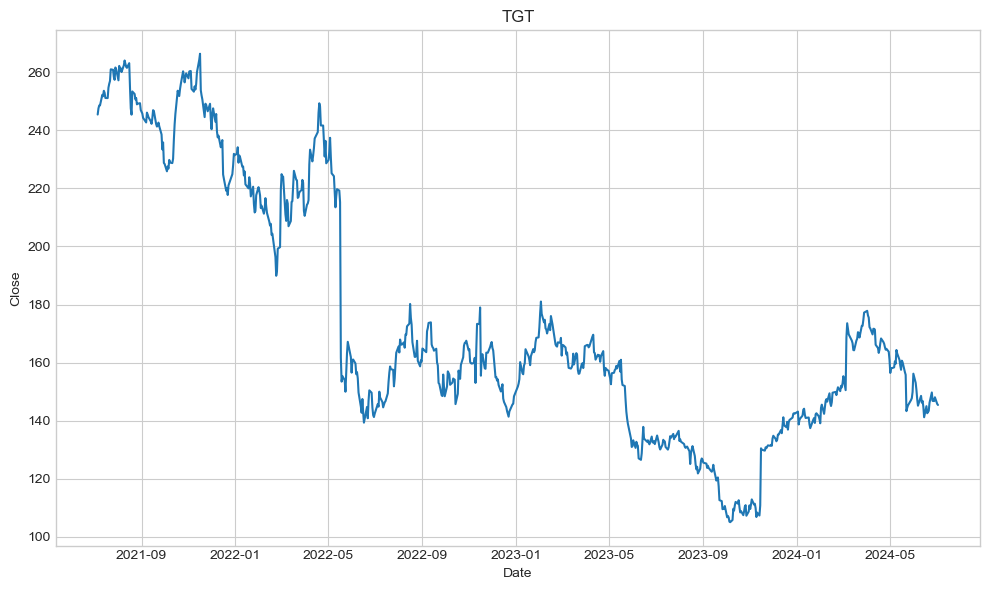

                 Close
Date                  
2021-07-06  245.449997
2021-07-07  247.550003
2021-07-08  248.580002
2021-07-09  248.580002
2021-07-12  252.240005
...                ...
2024-06-26  147.169998
2024-06-27  146.720001
2024-06-28  148.039993
2024-07-01  145.740005
2024-07-02  145.389999

[753 rows x 1 columns]


In [50]:
TGT = get_data('TGT', 3)
plot(TGT, title='TGT')
print(TGT)

# TGT.to_excel('TGT3.xlsx')

In [51]:
def stationary_and_arma(data):
    # Initial stationarity check
    adf_result = adfuller(data)
    p_value = adf_result[1]
    
    if p_value < 0.05:
        print('Raw data is stationary')
    else:
        print('Raw data is non-stationary')
        max_lags = 10  # Maximum number of differencing lags
        for i in range(1, max_lags + 1):
            differenced_data = data.diff(i).dropna()
            differenced_data.index = data.index[i:]
            differenced_data.columns = ['Close']
            p_value = adfuller(differenced_data)[1]
            if i == 1:
                print(f'ADF test p-value after {i}st differencing: {p_value}')
            elif i == 2:
                print(f'ADF test p-value after {i}nd differencing: {p_value}')
            elif i == 3:
                print(f'ADF test p-value after {i}rd differencing: {p_value}')
            else:
                print(f'ADF test p-value after {i}th differencing: {p_value}')

            
            if p_value < 0.05:
                print(f'Data is stationary after {i} differencing')
                if i == 1:
                    plot(differenced_data, f'{i}st Difference')
                elif i == 2:
                    plot(differenced_data, f'{i}nd Difference')
                elif i == 3:
                    plot(differenced_data, f'{i}rd Difference')
                else:
                    plot(differenced_data, f'{i}th Difference')
                return differenced_data
        
        print('Data is non-stationary after maximum differencing attempts')
        return None

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Raw data is non-stationary
ADF test p-value after 1st differencing: 3.0723774668063993e-27
Data is stationary after 1 differencing


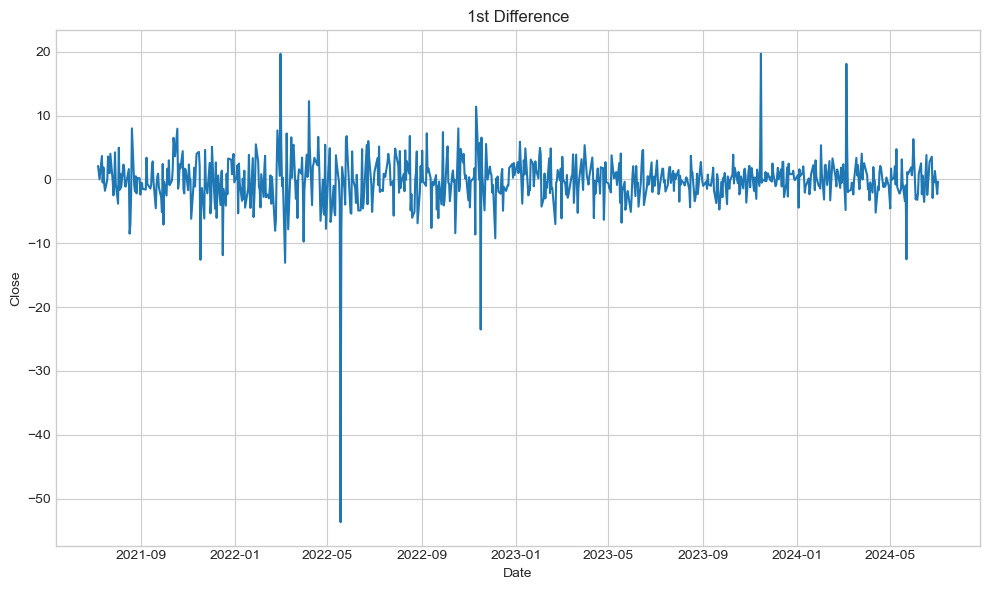

,Close
Date,
2021-07-07,2.100006
2021-07-08,1.029999
2021-07-09,0.000000
2021-07-12,3.660004
2021-07-13,-0.490005
...,...
2024-06-26,0.399994
2024-06-27,-0.449997
2024-06-28,1.319992


In [52]:
stationary_and_arma(TGT)

Data is non-stationary
ADF test p-value after 1 differencing: 6.653152786154298e-06
Data is stationary after 1 differencing


/var/folders/tm/kl4t319n5jgfsgdb7mkfmgh40000gn/T/ipykernel_10622/2572655452.py:36: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)


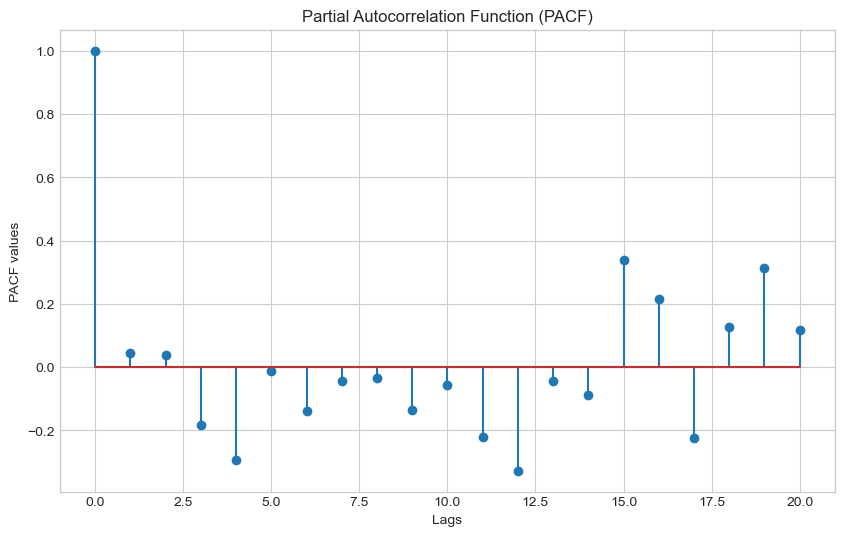

/var/folders/tm/kl4t319n5jgfsgdb7mkfmgh40000gn/T/ipykernel_10622/2572655452.py:48: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)


Suggested number of AR terms (p): 0


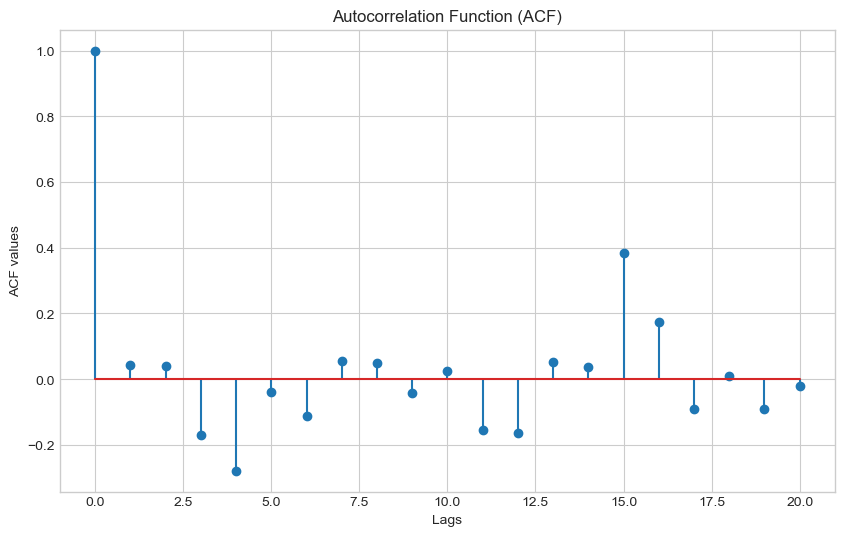

Suggested number of MA terms (q): 0
Differenced data ready for ARMA modeling


In [53]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt

def stationary_and_arma(data):
    # Initial stationarity check
    adf_result = adfuller(data)
    p_value = adf_result[1]
    
    if p_value < 0.05:
        print('Data is stationary')
        stationary_data = data
    else:
        print('Data is non-stationary')
        max_lags = 10  # Maximum number of differencing lags
        for i in range(1, max_lags + 1):
            differenced_data = data.diff(i).dropna()
            adf_result = adfuller(differenced_data)
            p_value = adf_result[1]
            print(f'ADF test p-value after {i} differencing: {p_value}')
            
            if p_value < 0.05:
                print(f'Data is stationary after {i} differencing')
                stationary_data = differenced_data
                break
        else:
            print('Data is still non-stationary after maximum differencing attempts')
            return None

    # Determine the number of AR terms (p) using PACF
    pacf_values = pacf(stationary_data, nlags=20)
    plt.figure(figsize=(10, 6))
    plt.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.xlabel('Lags')
    plt.ylabel('PACF values')
    plt.show()

    p = np.argmax(pacf_values < 0.05) - 1 if any(pacf_values < 0.05) else 0
    print(f'Suggested number of AR terms (p): {p}')

    # Determine the number of MA terms (q) using ACF
    acf_values = acf(stationary_data, nlags=20)
    plt.figure(figsize=(10, 6))
    plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lags')
    plt.ylabel('ACF values')
    plt.show()

    q = np.argmax(acf_values < 0.05) - 1 if any(acf_values < 0.05) else 0
    print(f'Suggested number of MA terms (q): {q}')

    return stationary_data, p, q

# Example usage with a sample data
data = pd.Series([172.63999938964844, 174.6699981689453, 177.2100067138672, 177.82000732421875,
                  176.24000549316406, 175.49000549316406, 172.22000122070312, 171.77000427246094,
                  169.6999969482422, 171.6300048828125, 171.6199951171875, 171.3300018310547,
                  166.1199951171875, 165.00999450683594, 163.32000732421875, 164.47000122070312,
                  166.5800018310547, 168.3000030517578, 167.11000061035156, 166.50999450683594,
                  165.33999633789062, 164.44000244140625, 164.74000549316406, 163.72999572753906,
                  160.97999572753906, 156.42999267578125, 158.1199951171875, 158.0399932861328,
                  158.35000610351562, 160.41000366210938, 159.58999633789062, 164.32000732421875,
                  163.1300048828125, 160.89999389648438, 158.9600067138672, 157.50999450683594,
                  160.64999389648438, 160.1300048828125, 156.7100067138672, 155.77999877929688,
                  143.27000427246094, 144.41000366210938, 145.22999572753906, 147.10000610351562,
                  147.74000549316406, 149.8699951171875, 156.16000366210938, 153.02999877929688,
                  150.5500030517578, 147.35000610351562, 145.1300048828125, 146.0,
                  148.52000427246094, 146.19000244140625, 146.77999877929688, 144.67999267578125,
                  141.16000366210938, 144.97000122070312, 142.5399932861328, 143.3800048828125,
                  146.1300048828125, 149.69000244140625])

stationary_data, p, q = stationary_and_arma(data)

if stationary_data is not None:
    print("Differenced data ready for ARMA modeling")
else:
    print("Data could not be made stationary")

In [18]:
# TGT.loc['2024-06-27']['Close']
# TGT.loc[str(today)]['Close']

Data is non-stationary
ADF test p-value after 1 differencing: 6.653152786154298e-06
Data is stationary after 1 differencing


/var/folders/tm/kl4t319n5jgfsgdb7mkfmgh40000gn/T/ipykernel_10622/2572655452.py:36: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)


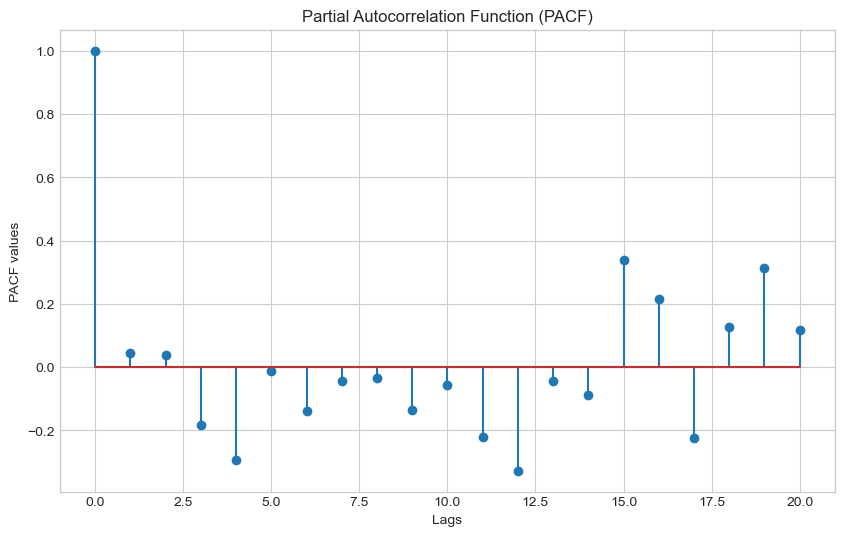

/var/folders/tm/kl4t319n5jgfsgdb7mkfmgh40000gn/T/ipykernel_10622/2572655452.py:48: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)


Suggested number of AR terms (p): 0


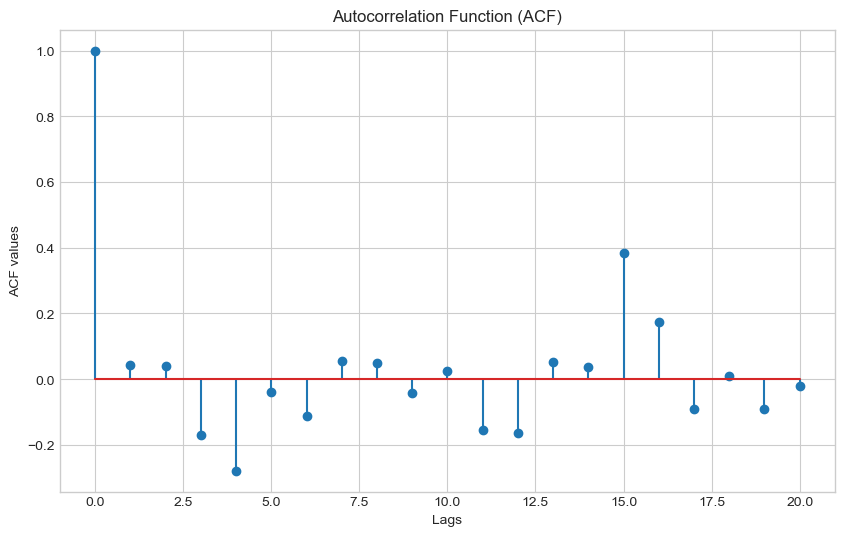

Suggested number of MA terms (q): 0
Differenced data ready for ARMA modeling
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:                          ARIMA   Log Likelihood                -148.929
Date:                Wed, 03 Jul 2024   AIC                            301.857
Time:                        18:34:51   BIC                            306.079
Sample:                             0   HQIC                           303.512
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3762      0.391     -0.962      0.336      -1.142       0.390
sigma2         7.7293      0.861      8.981      0.000

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


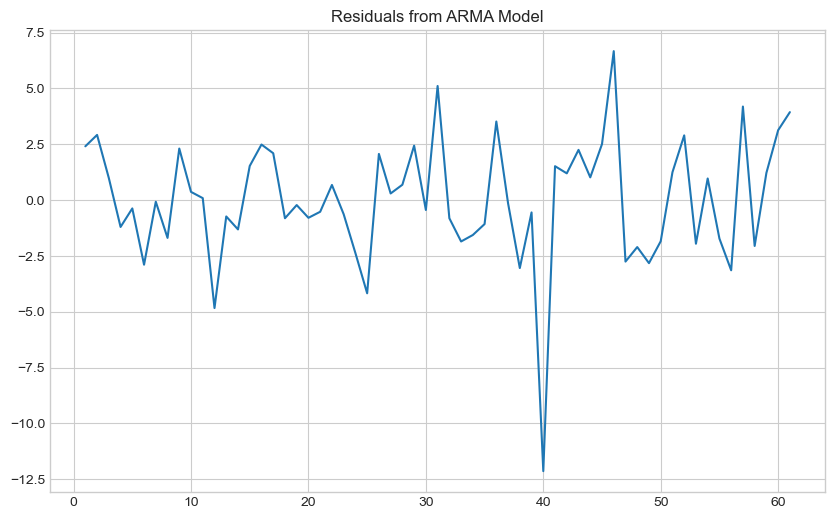

/var/folders/tm/kl4t319n5jgfsgdb7mkfmgh40000gn/T/ipykernel_10622/2808528651.py:97: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf_resid)), acf_resid, use_line_collection=True)


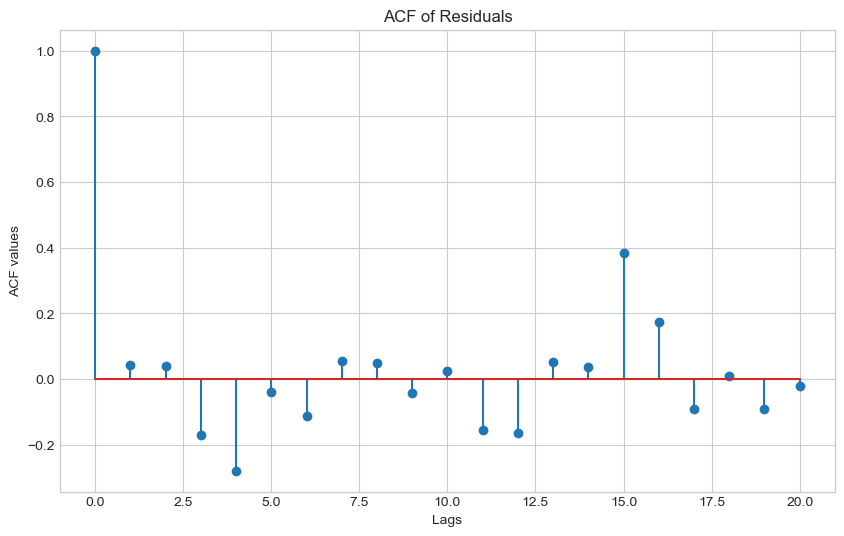

Forecasted values: -0.37623444320062305.
Real forecasted value: 145.01376494644782


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/tm/kl4t319n5jgfsgdb7mkfmgh40000gn/T/ipykernel_10622/2808528651.py:105: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  forecast = float(model_fit.forecast(steps=1))


In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def stationary_and_arma_pred(data):
    # Initial stationarity check
    adf_result = adfuller(data)
    p_value = adf_result[1]
    
    if p_value < 0.05:
        print('Data is stationary')
        stationary_data = data
    else:
        print('Data is non-stationary')
        max_lags = 10  # Maximum number of differencing lags
        for i in range(1, max_lags + 1):
            differenced_data = data.diff(i).dropna()
            adf_result = adfuller(differenced_data)
            p_value = adf_result[1]
            print(f'ADF test p-value after {i} differencing: {p_value}')
            
            if p_value < 0.05:
                print(f'Data is stationary after {i} differencing')
                stationary_data = differenced_data
                break
        else:
            print('Data is still non-stationary after maximum differencing attempts')
            return None, None, None

    # Determine the number of AR terms (p) using PACF
    pacf_values = pacf(stationary_data, nlags=20)
    plt.figure(figsize=(10, 6))
    plt.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.xlabel('Lags')
    plt.ylabel('PACF values')
    plt.show()

    p = np.argmax(pacf_values < 0.05) - 1 if any(pacf_values < 0.05) else 0
    print(f'Suggested number of AR terms (p): {p}')

    # Determine the number of MA terms (q) using ACF
    acf_values = acf(stationary_data, nlags=20)
    plt.figure(figsize=(10, 6))
    plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lags')
    plt.ylabel('ACF values')
    plt.show()

    q = np.argmax(acf_values < 0.05) - 1 if any(acf_values < 0.05) else 0
    print(f'Suggested number of MA terms (q): {q}')

    return stationary_data, p, q

# Example usage with a sample data
data = pd.Series([172.63999938964844, 174.6699981689453, 177.2100067138672, 177.82000732421875,
                  176.24000549316406, 175.49000549316406, 172.22000122070312, 171.77000427246094,
                  169.6999969482422, 171.6300048828125, 171.6199951171875, 171.3300018310547,
                  166.1199951171875, 165.00999450683594, 163.32000732421875, 164.47000122070312,
                  166.5800018310547, 168.3000030517578, 167.11000061035156, 166.50999450683594,
                  165.33999633789062, 164.44000244140625, 164.74000549316406, 163.72999572753906,
                  160.97999572753906, 156.42999267578125, 158.1199951171875, 158.0399932861328,
                  158.35000610351562, 160.41000366210938, 159.58999633789062, 164.32000732421875,
                  163.1300048828125, 160.89999389648438, 158.9600067138672, 157.50999450683594,
                  160.64999389648438, 160.1300048828125, 156.7100067138672, 155.77999877929688,
                  143.27000427246094, 144.41000366210938, 145.22999572753906, 147.10000610351562,
                  147.74000549316406, 149.8699951171875, 156.16000366210938, 153.02999877929688,
                  150.5500030517578, 147.35000610351562, 145.1300048828125, 146.0,
                  148.52000427246094, 146.19000244140625, 146.77999877929688, 144.67999267578125,
                  141.16000366210938, 144.97000122070312, 142.5399932861328, 143.3800048828125,
                  146.1300048828125, 149.69000244140625])

stationary_data, p, q = stationary_and_arma(data)

if stationary_data is not None:
    print("Differenced data ready for ARMA modeling")
    # Fit the ARMA model
    model = ARIMA(stationary_data, order=(p, 0, q))
    model_fit = model.fit()

    # Print summary of the model
    print(model_fit.summary())

    # Plot the residuals
    residuals = model_fit.resid
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title('Residuals from ARMA Model')
    plt.show()

    # Plot ACF of residuals to check for white noise
    acf_resid = acf(residuals, nlags=20)
    plt.figure(figsize=(10, 6))
    plt.stem(range(len(acf_resid)), acf_resid, use_line_collection=True)
    plt.title('ACF of Residuals')
    plt.xlabel('Lags')
    plt.ylabel('ACF values')
    plt.show()

    # Forecast future values
    last_price = float(TGT.loc[str(today)]['Close'])
    forecast = float(model_fit.forecast(steps=1))
    print(f'Forecasted values: {forecast}.\nReal forecasted value: {last_price + forecast}')
else:
    print("Data could not be made stationary")


# Placeholder

In [20]:
p_value = []
length = [1, 2, 3 ,4 ,5, 6, 7, 8, 9, 10]
for i in length:
    p_value.append(adfuller(diff(TGT, i))[1])
p_value

[3.0723774668063993e-27,
 5.8066053543837645e-06,
 7.075395098907797e-06,
 2.598457613390058e-06,
 5.873238810600461e-06,
 1.6524967655534603e-06,
 4.344837562876944e-07,
 9.723303933380242e-06,
 3.171331315744078e-05,
 2.88044282099484e-05]

In [ ]:
price_p_value = adfuller(TGT)[1]
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

In [ ]:
# First Differencing
diff1 = diff(TGT, 1)
# print(diff1)
plot(diff1, '1st Difference')

# file_name = 'diff1_1.xlsx'
# pd.DataFrame(diff1).to_excel(file_name)

In [ ]:
# Check Stationarity (Augmented Dickey Fuller Tests)
diff_p = adfuller(diff1)[1]
if diff_p > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

# ACF and PACF

In [ ]:
data = TGT
acf = plot_acf(np.array(diff(data, 1)))
pacf = plot_pacf(np.array(diff(data, 1)))

In [ ]:
# Plot ACF and PACF, Identify AR and MA periods
data = TGT
acf = plot_acf(np.array(diff(data, 2)))
pacf = plot_pacf(np.array(diff(data, 2)))

# GARCH Analysis

# 5 Days Volatility

In [ ]:
vol5 = volatility(TGT, 5)
plot(vol5, '5 Days Volatility')
# vol5

In [ ]:
price_p_value = adfuller(vol5)[1]
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

In [ ]:
vol5_annual = (np.log(vol5) * np.sqrt(252)).tolist()
plot(vol5_annual, '5 Days Annualized Volatility')
# vol5_annual

In [ ]:
price_p_value = adfuller(vol5_annual)[1]
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

# Annual Volatility (Implied Volatility)

In [ ]:
vol_annual = np.std(np.array((np.log(TGT) - np.log(TGT.shift(1))).dropna()).tolist()) * np.sqrt(len(get_data('TGT', 1)))
vol_annual